In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
from IPython.display import Image, display
from wordcloud import WordCloud

# EXTRACT AND PRE-PROCESSING DATA

## Product dataframe 

In [2]:
df_product = pd.read_csv(r'C:\Users\ASUS\Desktop\T\ĐAN_KLTN\getdata\combined_data.csv')
df_product

,titles,links,prices,discounts,countReviews,countSales
0,Dép Lê Thoáng Khí Đục Lỗ Bít Mũi Mùa Hè Đi Ra ...,https://www.lazada.vn/products/dep-le-thoang-k...,95000,Voucher giảm 40%,15,78
1,Dép Đế Xuồng Đế Dày Thời Trang Mùa Hè Cho Nữ Đ...,https://www.lazada.vn/products/dep-de-xuong-de...,62000,Voucher giảm 87%,4,6
2,SPICYG Darlingism Đầm Maxistyle Dài Thời Trang...,https://www.lazada.vn/products/spicyg-darlingi...,171071,Voucher giảm 58%,5,22
3,ISARO Giày thể thao vải lưới thời trang 2024 d...,https://www.lazada.vn/products/isaro-giay-the-...,45000,Voucher giảm 50%,19,31
4,"Dép nơ thời trang nữ, gót vuông 3 phân phù hợp...",https://www.lazada.vn/products/dep-no-thoi-tra...,120000,NaN,28,51
...,...,...,...,...,...,...
7158,Bộ tập pickleball áo polo PL chân váy xoè xếp ...,https://www.lazada.vn/products/bo-tap-pickleba...,278000,Voucher giảm 15%,119,6
7159,Đồ tập gym yoga nữ set bộ áo crop ngắn tay kèm...,https://www.lazada.vn/products/do-tap-gym-yoga...,181000,Voucher giảm 47%,5,521
7160,mẫu đồ lam đi chùɑ #bộ bà lai gấm phối lụa-phá...,https://www.lazada.vn/products/mau-do-lam-di-c...,209000,NaN,120,27
7161,[HCM] Đồ bộ lanh (tole) trung niên SHOP5SAO ta...,https://www.lazada.vn/products/hcm-do-bo-lanh-...,140600,Voucher giảm 24%,4,6


In [3]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7163 entries, 0 to 7162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titles        7163 non-null   object
 1   links         7163 non-null   object
 2   prices        7163 non-null   int64 
 3   discounts     5902 non-null   object
 4   countReviews  7163 non-null   int64 
 5   countSales    7163 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 335.9+ KB


In [4]:
df_product.duplicated().sum()

2

In [5]:
df_product = df_product.drop_duplicates()

In [6]:
df_product.loc[:, 'discounts'] = df_product['discounts'].apply(lambda x: unicodedata.normalize('NFC', str(x)) if pd.notna(x) else x)

In [7]:
df_product['discounts'] = df_product['discounts'].str.extract(r'(\d+)').astype(float) / 100
df_product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10592\1342028596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['discounts'] = df_product['discounts'].str.extract(r'(\d+)').astype(float) / 100


,titles,links,prices,discounts,countReviews,countSales
0,Dép Lê Thoáng Khí Đục Lỗ Bít Mũi Mùa Hè Đi Ra ...,https://www.lazada.vn/products/dep-le-thoang-k...,95000,0.40,15,78
1,Dép Đế Xuồng Đế Dày Thời Trang Mùa Hè Cho Nữ Đ...,https://www.lazada.vn/products/dep-de-xuong-de...,62000,0.87,4,6
2,SPICYG Darlingism Đầm Maxistyle Dài Thời Trang...,https://www.lazada.vn/products/spicyg-darlingi...,171071,0.58,5,22
3,ISARO Giày thể thao vải lưới thời trang 2024 d...,https://www.lazada.vn/products/isaro-giay-the-...,45000,0.50,19,31
4,"Dép nơ thời trang nữ, gót vuông 3 phân phù hợp...",https://www.lazada.vn/products/dep-no-thoi-tra...,120000,NaN,28,51
...,...,...,...,...,...,...
7158,Bộ tập pickleball áo polo PL chân váy xoè xếp ...,https://www.lazada.vn/products/bo-tap-pickleba...,278000,0.15,119,6
7159,Đồ tập gym yoga nữ set bộ áo crop ngắn tay kèm...,https://www.lazada.vn/products/do-tap-gym-yoga...,181000,0.47,5,521
7160,mẫu đồ lam đi chùɑ #bộ bà lai gấm phối lụa-phá...,https://www.lazada.vn/products/mau-do-lam-di-c...,209000,NaN,120,27
7161,[HCM] Đồ bộ lanh (tole) trung niên SHOP5SAO ta...,https://www.lazada.vn/products/hcm-do-bo-lanh-...,140600,0.24,4,6


In [8]:
df_product.loc[:, 'discounts'] = df_product['discounts'].fillna(0)

In [9]:
df_product.loc[:, 'img'] = 'C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/' + df_product.index.astype(str) + '.jpg'
df_product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10592\2958175211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product.loc[:, 'img'] = 'C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/' + df_product.index.astype(str) + '.jpg'


,titles,links,prices,discounts,countReviews,countSales,img
0,Dép Lê Thoáng Khí Đục Lỗ Bít Mũi Mùa Hè Đi Ra ...,https://www.lazada.vn/products/dep-le-thoang-k...,95000,0.40,15,78,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/0.jpg
1,Dép Đế Xuồng Đế Dày Thời Trang Mùa Hè Cho Nữ Đ...,https://www.lazada.vn/products/dep-de-xuong-de...,62000,0.87,4,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/1.jpg
2,SPICYG Darlingism Đầm Maxistyle Dài Thời Trang...,https://www.lazada.vn/products/spicyg-darlingi...,171071,0.58,5,22,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/2.jpg
3,ISARO Giày thể thao vải lưới thời trang 2024 d...,https://www.lazada.vn/products/isaro-giay-the-...,45000,0.50,19,31,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/3.jpg
4,"Dép nơ thời trang nữ, gót vuông 3 phân phù hợp...",https://www.lazada.vn/products/dep-no-thoi-tra...,120000,0.00,28,51,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/4.jpg
...,...,...,...,...,...,...,...
7158,Bộ tập pickleball áo polo PL chân váy xoè xếp ...,https://www.lazada.vn/products/bo-tap-pickleba...,278000,0.15,119,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/715...
7159,Đồ tập gym yoga nữ set bộ áo crop ngắn tay kèm...,https://www.lazada.vn/products/do-tap-gym-yoga...,181000,0.47,5,521,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/715...
7160,mẫu đồ lam đi chùɑ #bộ bà lai gấm phối lụa-phá...,https://www.lazada.vn/products/mau-do-lam-di-c...,209000,0.00,120,27,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/716...
7161,[HCM] Đồ bộ lanh (tole) trung niên SHOP5SAO ta...,https://www.lazada.vn/products/hcm-do-bo-lanh-...,140600,0.24,4,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/716...


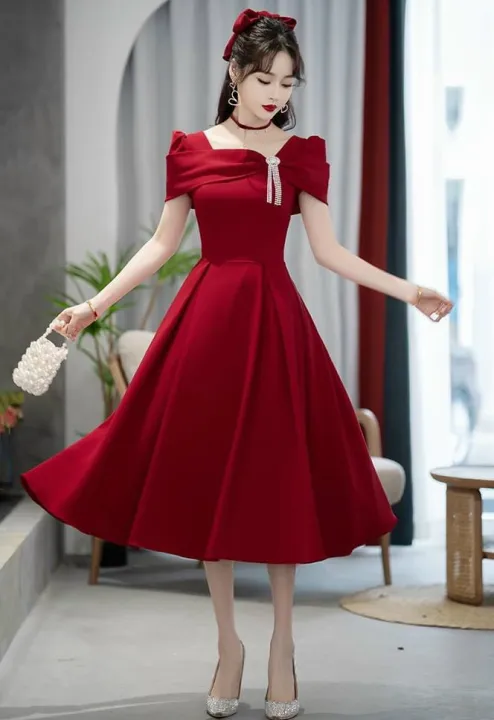

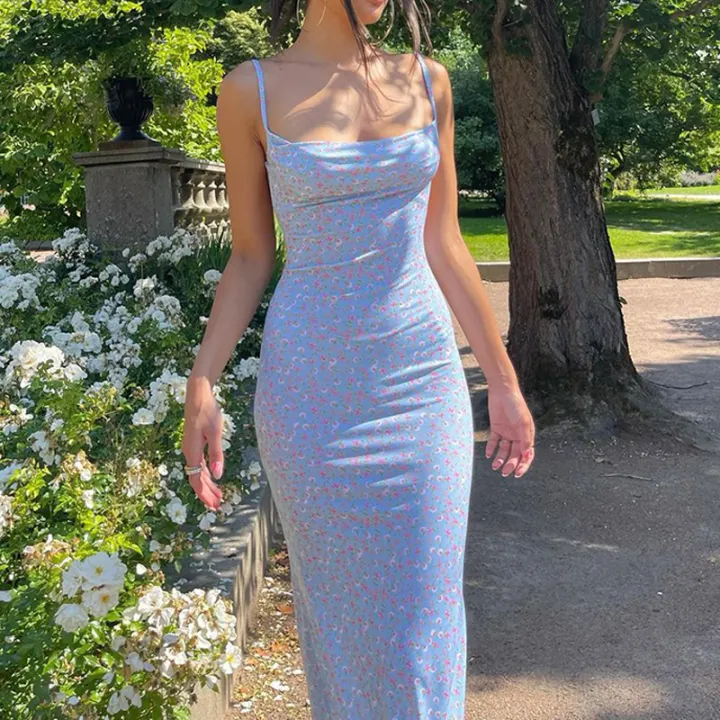

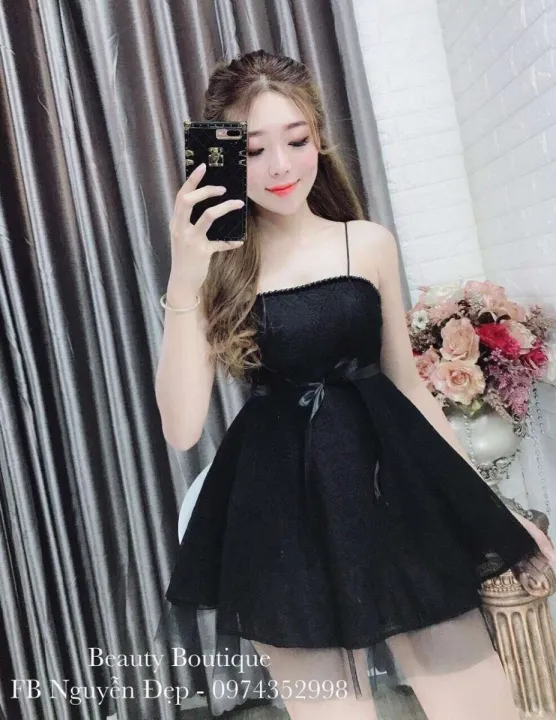

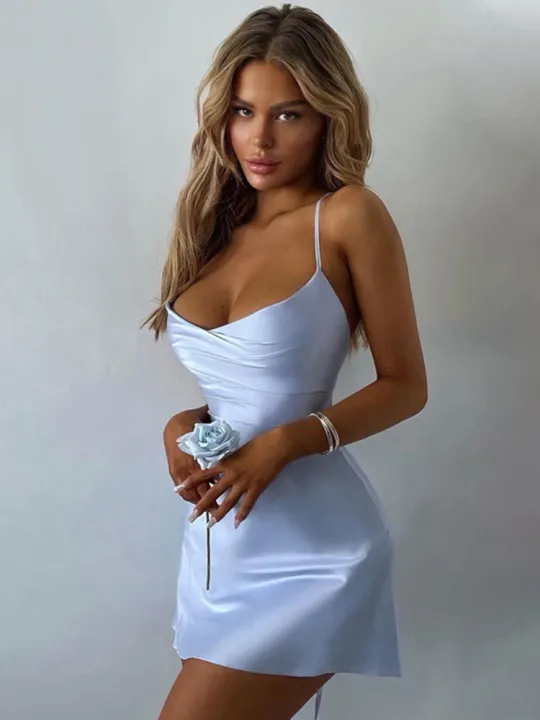

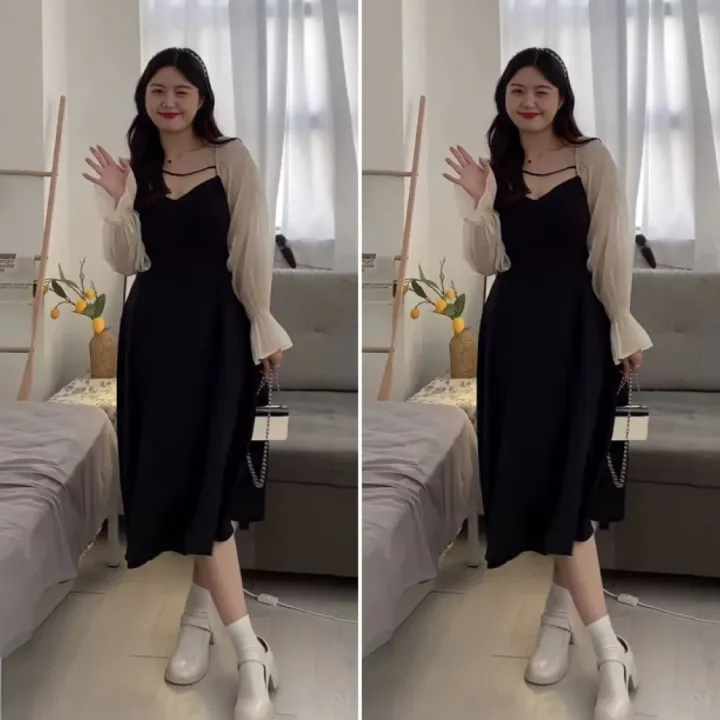

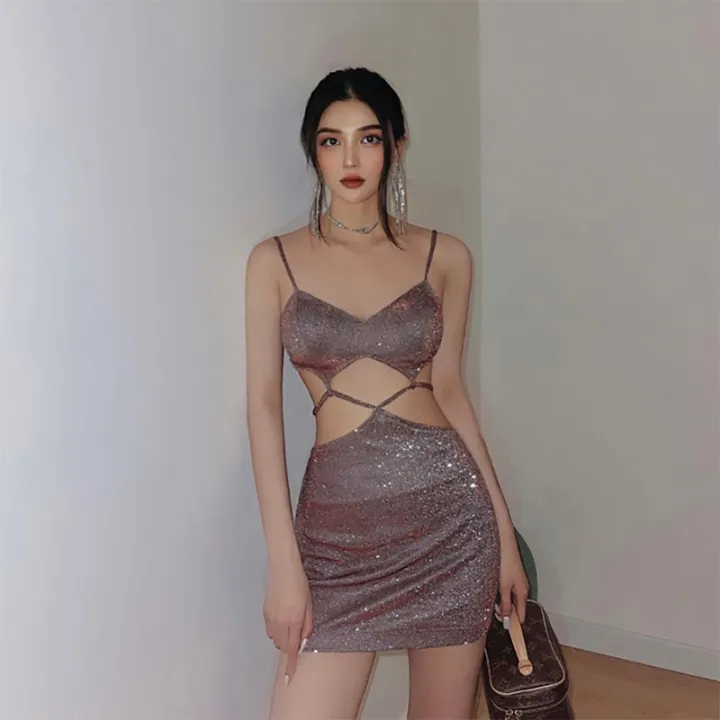

In [10]:
for path in df_product.loc[2790:2795, 'img']:
    display(Image(filename=path))

In [11]:
df_product.loc[:, 'titles'] = df_product['titles'].apply(lambda x: unicodedata.normalize('NFC', x))

In [12]:
len(df_product[df_product['prices'] <= 0])

1

In [13]:
df_product[df_product['prices'] <= 0]

,titles,links,prices,discounts,countReviews,countSales,img
1208,titles,links,0,0.0,0,0,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/120...


In [14]:
df_product = df_product.drop([1208])

In [15]:
len(df_product[df_product['countReviews'] < 0])

0

In [16]:
len(df_product[df_product['countSales'] < 0])

0

In [17]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, 0 to 7162
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        7160 non-null   object 
 1   links         7160 non-null   object 
 2   prices        7160 non-null   int64  
 3   discounts     7160 non-null   float64
 4   countReviews  7160 non-null   int64  
 5   countSales    7160 non-null   int64  
 6   img           7160 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 447.5+ KB


In [34]:
df_product

,titles,links,prices,discounts,countReviews,countSales,img
0,Dép Lê Thoáng Khí Đục Lỗ Bít Mũi Mùa Hè Đi Ra ...,https://www.lazada.vn/products/dep-le-thoang-k...,95000,0.40,15,78,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/0.jpg
1,Dép Đế Xuồng Đế Dày Thời Trang Mùa Hè Cho Nữ Đ...,https://www.lazada.vn/products/dep-de-xuong-de...,62000,0.87,4,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/1.jpg
2,SPICYG Darlingism Đầm Maxistyle Dài Thời Trang...,https://www.lazada.vn/products/spicyg-darlingi...,171071,0.58,5,22,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/2.jpg
3,ISARO Giày thể thao vải lưới thời trang 2024 d...,https://www.lazada.vn/products/isaro-giay-the-...,45000,0.50,19,31,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/3.jpg
4,"Dép nơ thời trang nữ, gót vuông 3 phân phù hợp...",https://www.lazada.vn/products/dep-no-thoi-tra...,120000,0.00,28,51,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/4.jpg
...,...,...,...,...,...,...,...
7158,Bộ tập pickleball áo polo PL chân váy xoè xếp ...,https://www.lazada.vn/products/bo-tap-pickleba...,278000,0.15,119,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/715...
7159,Đồ tập gym yoga nữ set bộ áo crop ngắn tay kèm...,https://www.lazada.vn/products/do-tap-gym-yoga...,181000,0.47,5,521,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/715...
7160,mẫu đồ lam đi chùɑ #bộ bà lai gấm phối lụa-phá...,https://www.lazada.vn/products/mau-do-lam-di-c...,209000,0.00,120,27,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/716...
7161,[HCM] Đồ bộ lanh (tole) trung niên SHOP5SAO ta...,https://www.lazada.vn/products/hcm-do-bo-lanh-...,140600,0.24,4,6,C:/Users/ASUS/Desktop/T/ĐAN_KLTN/getImages/716...


## Product's comments dataframe 

In [18]:
df_cmt = pd.read_csv(r'C:\Users\ASUS\Desktop\T\ĐAN_KLTN\getcomment\combined_data.csv')
df_cmt

,name_comment,content_comment,skuInfo_comment,like_count,star_count,Link,stt
0,Duyên T.Chứng nhận đã mua hàng,"mang êm chân lắm, ai thích mang ôm chân lấy n...","Nhóm màu:Nâu, Kích cỡ:40-41",1,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
1,Đặng T.Chứng nhận đã mua hàng,"Bền và chắc chắn, Khuyến khích trò chơi tưởng ...","Nhóm màu:Nâu, Kích cỡ:38-39",2,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
2,cao N.Chứng nhận đã mua hàng,hàng tốt,"Nhóm màu:Màu cam, Kích cỡ:36-37",2,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
3,9***0Chứng nhận đã mua hàng,"Dép mang khg thoải mái,vì vô sát cổ chân quá,h...","Nhóm màu:Đen, Kích cỡ:36-37",0,3,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
4,Thu P.Chứng nhận đã mua hàng,Nhẹ nhàng thoải mái độ cao vừa giúp chân sạch...,"Nhóm màu:Đen, Kích cỡ:36-37",0,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
...,...,...,...,...,...,...,...
127621,Nguyễn T.Chứng nhận đã mua hàng,"Hoàn hảo cho mùa hè, Họa tiết hoa phong cách, ...","Nhóm Màu:Trắng, Kích cỡ:Int:XXL",1,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127622,Nguyễn T.Chứng nhận đã mua hàng,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:XXL",0,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127623,Van U.Chứng nhận đã mua hàng,"Đa năng cho trang phục văn phòng, Họa tiết hoa...","Nhóm Màu:Xanh, Kích cỡ:Int:S",2,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127624,Uyên N.Chứng nhận đã mua hàng,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:M",0,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg


In [19]:
df_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127626 entries, 0 to 127625
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name_comment     127626 non-null  object
 1   content_comment  126923 non-null  object
 2   skuInfo_comment  127626 non-null  object
 3   like_count       127626 non-null  object
 4   star_count       127626 non-null  object
 5   Link             127626 non-null  object
 6   stt              127626 non-null  object
dtypes: object(7)
memory usage: 6.8+ MB


In [20]:
df_cmt['name_comment'] = np.where(
    df_cmt['name_comment'].str.contains('Chứng nhận đã mua hàng', na=False),
    df_cmt['name_comment'].str.extract(r'^(.*?\.)')[0],
    df_cmt['name_comment']
)
df_cmt

,name_comment,content_comment,skuInfo_comment,like_count,star_count,Link,stt
0,Duyên T.,"mang êm chân lắm, ai thích mang ôm chân lấy n...","Nhóm màu:Nâu, Kích cỡ:40-41",1,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
1,Đặng T.,"Bền và chắc chắn, Khuyến khích trò chơi tưởng ...","Nhóm màu:Nâu, Kích cỡ:38-39",2,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
2,cao N.,hàng tốt,"Nhóm màu:Màu cam, Kích cỡ:36-37",2,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
3,NaN,"Dép mang khg thoải mái,vì vô sát cổ chân quá,h...","Nhóm màu:Đen, Kích cỡ:36-37",0,3,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
4,Thu P.,Nhẹ nhàng thoải mái độ cao vừa giúp chân sạch...,"Nhóm màu:Đen, Kích cỡ:36-37",0,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
...,...,...,...,...,...,...,...
127621,Nguyễn T.,"Hoàn hảo cho mùa hè, Họa tiết hoa phong cách, ...","Nhóm Màu:Trắng, Kích cỡ:Int:XXL",1,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127622,Nguyễn T.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:XXL",0,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127623,Van U.,"Đa năng cho trang phục văn phòng, Họa tiết hoa...","Nhóm Màu:Xanh, Kích cỡ:Int:S",2,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg
127624,Uyên N.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:M",0,5,https://www.lazada.vn/products/set-do-nu-kem-c...,5900.jpg


In [21]:
df_cmt[df_cmt['name_comment'].isna() | (df_cmt['name_comment'].str.strip() == '')]

,name_comment,content_comment,skuInfo_comment,like_count,star_count,Link,stt
3,NaN,"Dép mang khg thoải mái,vì vô sát cổ chân quá,h...","Nhóm màu:Đen, Kích cỡ:36-37",0,3,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
5,NaN,sản phẩm. êm. thoải mái \nĐúng size..ủng hộ shop,"Nhóm màu:Đen, Kích cỡ:36-37",0,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
6,NaN,êm chân thoải mái cho shop 5 sao,"Nhóm màu:Nâu, Kích cỡ:38-39",0,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
7,NaN,😌Thoải mái:đẹp,"Nhóm màu:Vàng mơ, Kích cỡ:36-37",0,5,https://www.lazada.vn/products/dep-le-thoang-k...,0.jpg
12,NaN,Phong cách:tốt\n Sự thoải mái:tốt\n Độ bền:chư...,"Nhóm màu:Hồng, Kích cỡ:40",0,5,https://www.lazada.vn/products/isaro-giay-the-...,3.jpg
...,...,...,...,...,...,...,...
127608,NaN,shop uy tín nên mua lần thứ 3 rồi... Hàng giao...,"Nhóm Màu:Tím, Size:S: 40 - 49 kg",1,5,https://www.lazada.vn/products/do-bo-nu-thiet-...,5896.jpg
127609,NaN,Tui nhận được đồ rồi nha. Gioa đúng kiểu tui đ...,"Nhóm Màu:Cam, Size:S: 40 - 49 kg",0,5,https://www.lazada.vn/products/do-bo-nu-thiet-...,5896.jpg
127614,NaN,Không mặc được,Nhóm Màu:ma10,2,5,https://www.lazada.vn/products/do-bo-dai-mac-n...,5897.jpg
127616,NaN,"Shop phục vụ tốt, đóng gói cẩn thận, shop tư v...","Nhóm Màu:màu 2, Kích cỡ:Int:L",0,5,https://www.lazada.vn/products/3-size-40-70kg-...,5899.jpg


In [22]:
df_cmt = df_cmt.drop(columns=['like_count'])
df_cmt = df_cmt.drop(columns=['stt'])
df_cmt

,name_comment,content_comment,skuInfo_comment,star_count,Link
0,Duyên T.,"mang êm chân lắm, ai thích mang ôm chân lấy n...","Nhóm màu:Nâu, Kích cỡ:40-41",5,https://www.lazada.vn/products/dep-le-thoang-k...
1,Đặng T.,"Bền và chắc chắn, Khuyến khích trò chơi tưởng ...","Nhóm màu:Nâu, Kích cỡ:38-39",5,https://www.lazada.vn/products/dep-le-thoang-k...
2,cao N.,hàng tốt,"Nhóm màu:Màu cam, Kích cỡ:36-37",5,https://www.lazada.vn/products/dep-le-thoang-k...
3,NaN,"Dép mang khg thoải mái,vì vô sát cổ chân quá,h...","Nhóm màu:Đen, Kích cỡ:36-37",3,https://www.lazada.vn/products/dep-le-thoang-k...
4,Thu P.,Nhẹ nhàng thoải mái độ cao vừa giúp chân sạch...,"Nhóm màu:Đen, Kích cỡ:36-37",5,https://www.lazada.vn/products/dep-le-thoang-k...
...,...,...,...,...,...
127621,Nguyễn T.,"Hoàn hảo cho mùa hè, Họa tiết hoa phong cách, ...","Nhóm Màu:Trắng, Kích cỡ:Int:XXL",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127622,Nguyễn T.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:XXL",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127623,Van U.,"Đa năng cho trang phục văn phòng, Họa tiết hoa...","Nhóm Màu:Xanh, Kích cỡ:Int:S",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127624,Uyên N.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:M",5,https://www.lazada.vn/products/set-do-nu-kem-c...


In [23]:
df_cmt['star_count'] = pd.to_numeric(df_cmt['star_count'], errors='coerce').fillna(0).astype(int)

In [24]:
df_cmt['content_comment'].isna().sum()

703

In [25]:
df_cmt = df_cmt.dropna(subset=['content_comment'])

In [26]:
df_cmt.loc[:, 'content_comment'] = df_cmt['content_comment'].apply(lambda x: unicodedata.normalize('NFC', x) if isinstance(x, str) else x)
df_cmt

,name_comment,content_comment,skuInfo_comment,star_count,Link
0,Duyên T.,"mang êm chân lắm, ai thích mang ôm chân lấy n...","Nhóm màu:Nâu, Kích cỡ:40-41",5,https://www.lazada.vn/products/dep-le-thoang-k...
1,Đặng T.,"Bền và chắc chắn, Khuyến khích trò chơi tưởng ...","Nhóm màu:Nâu, Kích cỡ:38-39",5,https://www.lazada.vn/products/dep-le-thoang-k...
2,cao N.,hàng tốt,"Nhóm màu:Màu cam, Kích cỡ:36-37",5,https://www.lazada.vn/products/dep-le-thoang-k...
3,NaN,"Dép mang khg thoải mái,vì vô sát cổ chân quá,h...","Nhóm màu:Đen, Kích cỡ:36-37",3,https://www.lazada.vn/products/dep-le-thoang-k...
4,Thu P.,Nhẹ nhàng thoải mái độ cao vừa giúp chân sạch ...,"Nhóm màu:Đen, Kích cỡ:36-37",5,https://www.lazada.vn/products/dep-le-thoang-k...
...,...,...,...,...,...
127621,Nguyễn T.,"Hoàn hảo cho mùa hè, Họa tiết hoa phong cách, ...","Nhóm Màu:Trắng, Kích cỡ:Int:XXL",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127622,Nguyễn T.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:XXL",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127623,Van U.,"Đa năng cho trang phục văn phòng, Họa tiết hoa...","Nhóm Màu:Xanh, Kích cỡ:Int:S",5,https://www.lazada.vn/products/set-do-nu-kem-c...
127624,Uyên N.,"Cảm ơn chị đã tin dùng sản phẩm của shop, hy v...","Nhóm Màu:Xanh, Kích cỡ:Int:M",5,https://www.lazada.vn/products/set-do-nu-kem-c...


In [27]:
df_cmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126923 entries, 0 to 127625
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   name_comment     77057 non-null   object
 1   content_comment  126923 non-null  object
 2   skuInfo_comment  126923 non-null  object
 3   star_count       126923 non-null  int32 
 4   Link             126923 non-null  object
dtypes: int32(1), object(4)
memory usage: 5.3+ MB


# VISUALIZE ATTRIBUTES IN DATAFRAMES

## Product dataframe 

In [43]:
df_product['prices'].describe().apply(lambda x: format(x, ',.0f'))

count        7,160
mean       189,338
std        200,700
min          1,000
25%         79,000
50%        130,000
75%        224,000
max      2,250,000
Name: prices, dtype: object

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10592\2692382772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_product, palette='Pastel1')


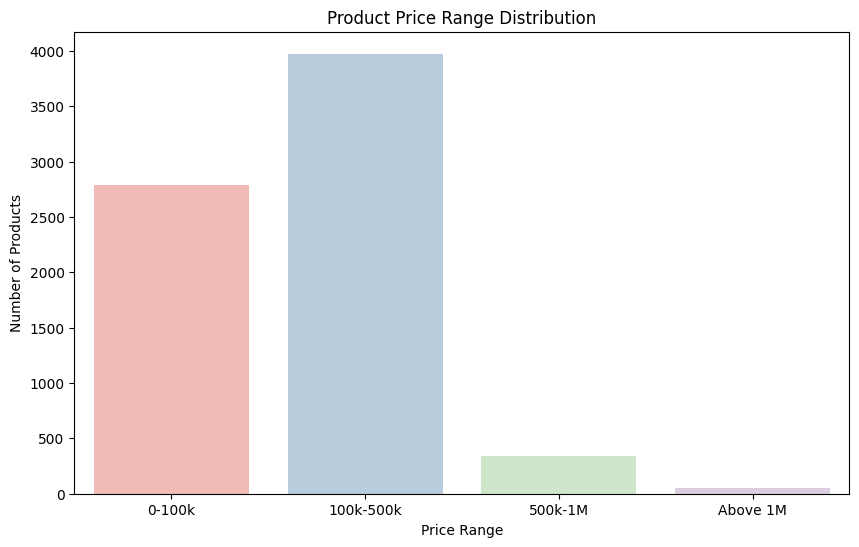

In [47]:
price_bins = [0, 100000, 500000, 1000000, float('inf')]
price_labels = ['0-100k', '100k-500k', '500k-1M', 'Above 1M']
df_product['price_range'] = pd.cut(df_product['prices'], bins=price_bins, labels=price_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df_product, palette='Pastel1')
plt.title('Product Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.show()

In [49]:
df_product['price_range'].value_counts()

price_range
100k-500k    3975
0-100k       2791
500k-1M       338
Above 1M       56
Name: count, dtype: int64

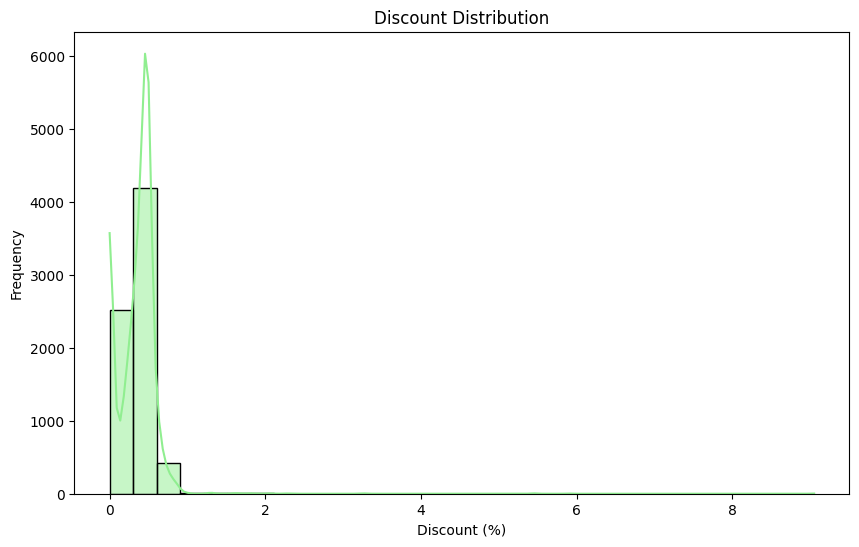

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df_product['discounts'], kde=True, color='lightgreen', bins=30)
plt.title('Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

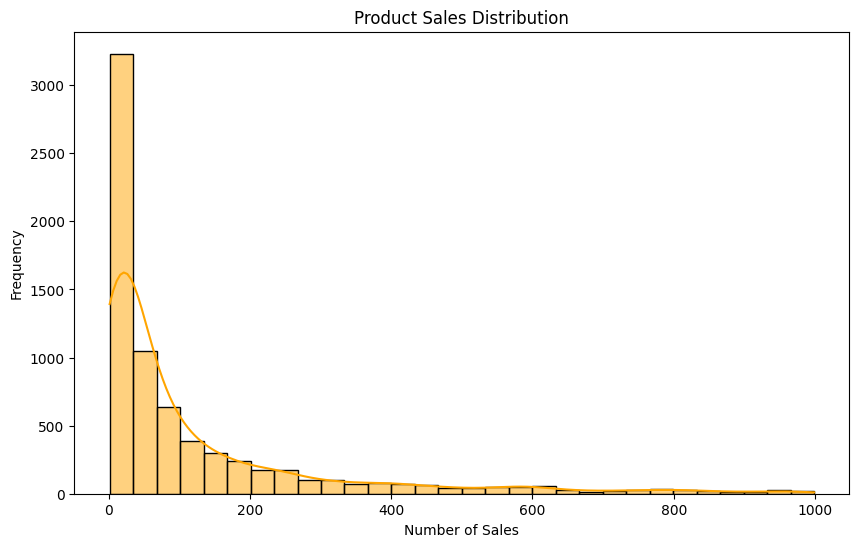

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df_product['countSales'], kde=True, color='orange', bins=30)
plt.title('Product Sales Distribution')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.show()

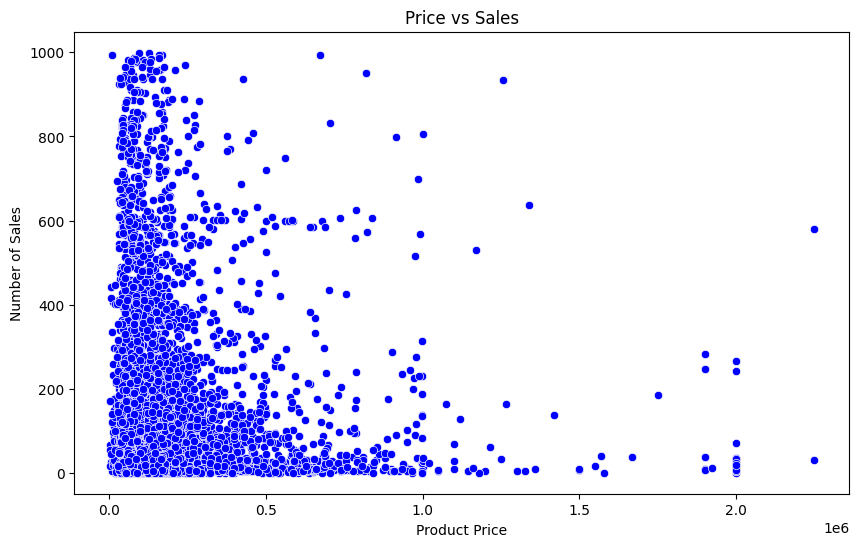

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prices', y='countSales', data=df_product, color='blue')
plt.title('Price vs Sales')
plt.xlabel('Product Price')
plt.ylabel('Number of Sales')
plt.show()

## Product's comments dataframe 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10592\1908551225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='star_count', data=df_cmt, palette='Blues')


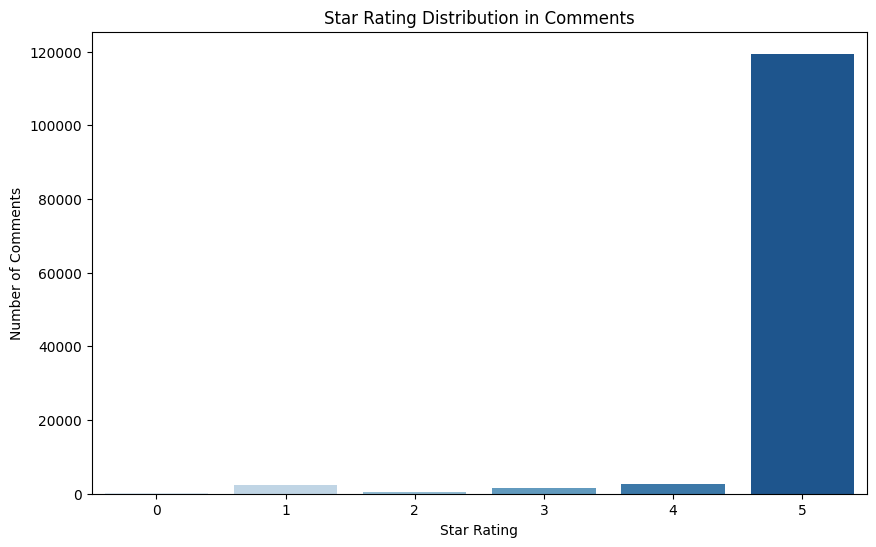

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='star_count', data=df_cmt, palette='Blues')
plt.title('Star Rating Distribution in Comments')
plt.xlabel('Star Rating')
plt.ylabel('Number of Comments')
plt.show()

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='star_count', y='countSales', data=df_product, palette='coolwarm')
plt.title('Star Rating vs Sales')
plt.xlabel('Star Rating')
plt.ylabel('Number of Sales')
plt.show()

ValueError: Could not interpret value `star_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
text = ' '.join(df_cmt['content_comment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [ ]:
df_cmt_count = df_cmt.groupby('Link').size().reset_index(name='count_comments')
df_cmt_count = df_cmt_count.merge(df_product[['links', 'titles']], left_on='Link', right_on='links', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x='titles', y='count_comments', data=df_cmt_count.head(20), palette='magma')
plt.title('Number of Comments per Product')
plt.xlabel('Product Title')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_cmt_count = df_cmt.groupby('Link').size().reset_index(name='count_comments')
df_cmt_count = df_cmt_count.merge(df_product[['links', 'titles']], left_on='Link', right_on='links', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x='titles', y='count_comments', data=df_cmt_count.head(20), palette='magma')
plt.title('Number of Comments per Product')
plt.xlabel('Product Title')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create a combined DataFrame with df_product and df_cmt
df_combined = pd.merge(df_product, df_cmt[['Link', 'star_count']], left_on='links', right_on='Link', how='left')

# Compute the correlation matrix
corr_matrix = df_combined[['prices', 'discounts', 'countSales', 'countReviews', 'star_count']].corr()

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Attributes')
plt.show()